用于画箱形图对比数据

In [ ]:
import scipy.stats as stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
font_manager.fontManager.addfont('/SanDisk/Li/font_libin/times.ttf')
import seaborn as sns
import numpy as np

In [ ]:
#设置绘图格式
config = {
    "font.family": 'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 20,
    "mathtext.fontset": 'stix',
}
plt.rcParams.update(config)

In [ ]:
origin = []
origin_onlyexc = []

with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

with open('prop_origin_onlyexc.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin_onlyexc.extend([float(item) for item in row])

fig, ax = plt.subplots()
ax.boxplot([origin,origin_onlyexc])
# ax.set_title(title[j])
# ax.set_xlabel('Weight')
ax.set_ylabel('Performance')
ax.set_xticklabels(['4000exc+1000inh', '5000exc'])
print(len(origin),len(origin_onlyexc))
t_statistic, p_value = stats.ttest_ind(origin,origin_onlyexc)
print(t_statistic,p_value)

In [ ]:
# 读取csv文件并画图

title = ['E -> E','I -> E','E -> I','I -> I']
data_name = ['prop_change_EE_70','prop_change_EE_130',
        'prop_change_EI_70','prop_change_EI_130',
        'prop_change_IE_70','prop_change_IE_130',
        'prop_change_II_70','prop_change_II_130']
data = [[],[],
        [],[],
        [],[],
        [],[],]
origin = []

for i in range(len(data_name)):
    with open(f'{data_name[i]}.csv', mode='r') as file:
        # 创建一个CSV阅读器
        reader = csv.reader(file)
        # 遍历CSV文件中的每一行
        for row in reader:
            data[i].extend([float(item) for item in row])
            # print(row)  # 每个`row`是一个列表，包含了CSV行中的数据
with open('prop_origin.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    # 遍历CSV文件中的每一行
    for row in reader:
        origin.extend([float(item) for item in row])

# data = np.array([np.array(item).astype(float) for item in data])
# origin = np.array(origin).astype(float)
j = 0
for i in range(0,8,2):
    fig, ax = plt.subplots()
    ax.boxplot([data[i],origin,data[i+1]])
    ax.set_title(title[j])
    ax.set_xlabel('Weight')
    ax.set_ylabel('Performance')
    ax.set_xticklabels(['-30%', '0', '+30%'])
    j += 1

    # 显示图形
    plt.show()

In [ ]:
#画performance对mu,RS和sigma的依赖
# folder = '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/2024_03_01_12_35_change_mu_RS_sigma/'
folder = '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/2024_03_05_11_47_change_mu_RS_sigma/'
# mu
with open(folder+'prop_change_mu.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: mu = [float(i) for i in row]
        else: 
            per_mu = [float(i) for i in row]
        count += 1

print(mu)
print(per_mu)

# import mplcyberpunk

# plt.style.use("cyberpunk")

fig, ax = plt.subplots()
ax.scatter(mu,per_mu)
# ax.set_yticks([])
# ax.set_ylim(0,300)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

# mplcyberpunk.make_scatter_glow()

In [ ]:
# RS
with open(folder+'prop_change_RS.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: rs = [float(i)/10 for i in row]
        else: 
            per_rs = [float(i) for i in row]
        count += 1

print(rs)
print(per_rs)
rs_sample = []
per_rs_sample = []
for i in range(len(rs)):
    if i %10 == 0:
        rs_sample.append(rs[i])
        per_rs_sample.append(per_rs[i])
print(rs_sample)
print(per_rs_sample)

fig, ax = plt.subplots()
ax.scatter(rs,per_rs)
# ax.scatter(rs_sample,per_rs_sample)
ax.set_ylim(-10000,100000)
ax.set_xlabel(r'Random Strength $\lambda$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')

In [ ]:
# Sigma
with open(folder+'prop_change_sigma.csv', mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: sigma = [float(i) for i in row]
        else: 
            per_sigma = [float(i) for i in row]
        count += 1

print(sigma)
print(per_sigma)

per_sigma = np.array(per_sigma)
deviation = per_sigma-np.mean(per_sigma)

fig, ax = plt.subplots()
ax.scatter(sigma,per_sigma)
# ax.set_ylim(-10000,200000)
# ax.set_ylim(-10000,50000)
# ax.set_ylim(-10000,10000)
plt.yscale('log')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$ (log scale)')

# fig, ax = plt.subplots()
# ax.scatter(sigma,deviation)
# ax.set_xlabel(r'$\sigma$')
# # ax.set_ylabel(r'Performance $\frac{Max(O_{Go})}{Max(O_{Nogo})}$')
# ax.set_ylabel('Deviation')

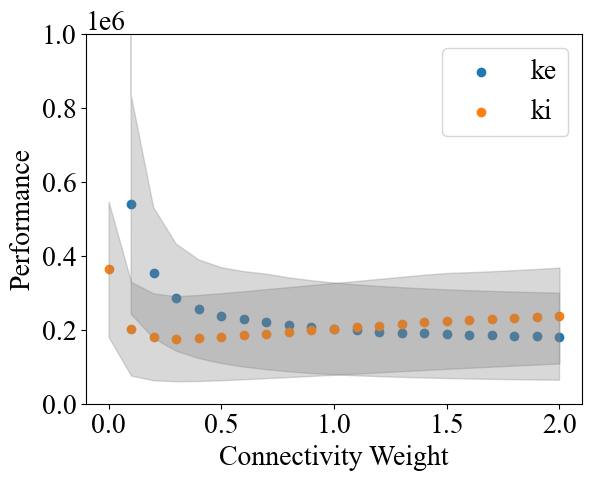

In [5]:

# 看任务表现分别随连接变化而变化
# 做50次测试，画图出来然后标出standard error
x = [i/10 for i in range(0,21)]

# for k in ['kee','kei','kie','kii']:
for k in ['ke','ki']:
    # with open(f'prop_change_{k}.csv', mode='r') as file:
    #     data = []
    #     # 创建一个CSV阅读器
    #     reader = csv.reader(file)
    #     # count = 0
    #     # 遍历CSV文件中的每一行
    #     for row in reader:
    #         # if count == 0: sigma = [float(i) for i in row]
    #         # else: 
    #         #     per_sigma = [float(i) for i in row]
    #         # count += 1
    #         # print(row)
    #         # data.append(float(row[0]))
    #         data.append([float(i) for i in row])
    #     #画图
    #     #散点图
    #     plt.scatter(x,data,label=k)
    #     plt.xlabel('Connectivity Weight')
    #     plt.ylabel('Performance')
    #     plt.legend()
    # print(data)

    data = pd.read_csv(f'prop_change_{k}.csv',header=None)
    #计算每一列的平均值
    mean_vals = data.mean()
    #计算标准误差
    sem_vals = data.sem()
    #画图
    #散点图
    plt.scatter(x,mean_vals,label=k)
    # plt.plot(x,mean_vals,label=k)
    plt.fill_between(x,mean_vals-sem_vals,mean_vals+sem_vals,color='gray',alpha=0.3)
    plt.xlabel('Connectivity Weight')
    plt.ylabel('Performance')
    plt.ylim(0,1000000)
    # plt.legend(fontsize='xx-small')
    plt.legend()






In [ ]:
# # 画相图 kee,kei,kie,kii的范围都是从0到2
# # 现阶段想看的是来自i的连接，那么就看kii-kei,作为对比,可以看看kii-kie和kie-kei

# # 用heatmap来展现

# # 读取数据
# # data = np.random.rand(10, 10)  # 生成一个10x10的随机矩阵
# paths = ['/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/prop_change_kii_kei.csv',
#          '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/prop_change_kii_kie.csv',
#          '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/prop_change_kei_kie.csv']
# for path_file in paths:
#     data = pd.read_csv(path_file,header = None)
#     data = data.values
#     # 使用seaborn的heatmap函数绘制热图
#     label_ticks = np.arange(0,2.1,0.1)
#     label_ticks = np.round(label_ticks,1)
#     label_ticks = label_ticks.astype(str)
#     for i in range(len(label_ticks)):
#         if i%2:
#             label_ticks[i] = ' '
    

#     # ax = sns.heatmap(data,cmap='coolwarm',xticklabels=label_ticks, yticklabels=label_ticks, vmin=25, vmax=28.5)  # annot=True显示数值，cmap设置颜色映射
#     ax = sns.heatmap(data,cmap='coolwarm',xticklabels=label_ticks, yticklabels=label_ticks)
#     # sns.heatmap(data,cmap='coolwarm')
#     xlabel = path_file.split('_')[-1][0:3]
#     ylabel = path_file.split('_')[-2]
#     # print(label_ticks)
#     # plt.xticks(ticks=np.arange(0, 21, 2), labels=label_ticks, rotation=45)
#     # plt.yticks(ticks=np.arange(0, 21, 2), labels=label_ticks, rotation=0)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     ax.xaxis.tick_top()
#     ax.xaxis.set_label_position('top')
#     colorbar = ax.collections[0].colorbar  # 获取colorbar对象
#     colorbar.set_label('Performance')  # 给colorbar添加描述文本
#     plt.show()





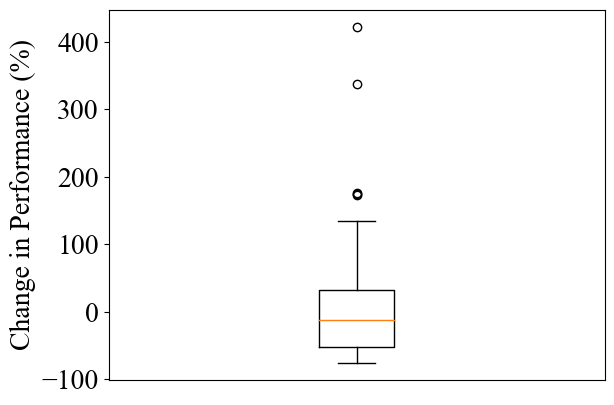

9.503488183586887


In [17]:
# 画 E VS EI
# 由于不同的trail performance 差距很大，分析perf_EI/perf_E在1周围的分布，或者均值和1的距离
# 对比提升和降低的百分比
data_path = '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/E_VS_EI.csv'

with open(data_path, mode='r') as file:
    # 创建一个CSV阅读器
    reader = csv.reader(file)
    count = 0
    # 遍历CSV文件中的每一行
    for row in reader:
        if count == 0: perf_E = [float(i) for i in row]
        else: 
            perf_EI = [float(i) for i in row]
        count += 1
# print(perf_E)
# print(perf_EI)

perf_E = np.array(perf_E)
perf_EI = np.array(perf_EI)

EI_to_E = perf_EI/perf_E
change = (perf_E-perf_EI)/perf_EI
change = change*100
# print(EI_to_E)
# print(np.mean(EI_to_E))

# t_stat, p_value = stats.ttest_rel(perf_EI, perf_E)
# print(f"t统计量: {t_stat}")
# print(f"P值: {p_value}")

#绘制直方图
# plt.hist(EI_to_E, bins=10, alpha=0.5, color='steelblue', edgecolor='black')
# plt.boxplot(EI_to_E)
# plt.boxplot([perf_E,perf_EI],labels=['EI','E_only'])
plt.boxplot(change)

# plt.xlabel('Category')
# plt.ylabel(r'$\frac{Performance_{EI}}{Performance_{E}}$')
# plt.ylabel(r'Performance')
plt.ylabel(r'Change in Performance (%)')
plt.xticks([])
# 设置标题和坐标轴标签
# plt.title('Histogram Example')
# plt.xlabel('Perf_EI to Perf_E_only')
# plt.ylabel('Frequency')
# 显示图形
plt.show()

print(np.mean(change))



In [ ]:
import numpy as np
np.array([1,2])/np.array([1,4])